##Library and utils
*italicized text*

In [ ]:
import itertools
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from math import copysign 
sign = lambda x : copysign(1, x) 

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

def transformToList(inputString):
    s = inputString.translate(str.maketrans({'{': '[', '}': ']', '(': '[', ')': ']'}))
    s = s.replace('[', ' [ ')
    s = s.replace(']', ' ] ')
    s = s.replace(',', ' , ')
    words = s.split()
    output = ""
    for word in words:
        if word=="[" or word=="]" or word==",": output+=word
        else: output+='"'+word+'"'
    out = json.loads(output)
    try:
        a = np.array(out).astype(np.float).tolist()
    except:
        a = out
    return a

class Activation:
    def stepFunction(u):
        if u>0: return 1
        elif u<0: return 0
        else: return 0.5


class Utility:
    def augmentArray(a, value=1, position=0):
        return np.insert(a, position, value, axis=len(a.shape)-1)
    
    def sampleNorm(data, target, mainClass = 1):
        if len(data) != len(target):
            print("incompatible array sizes - sampleNorm")
            return
        for i in range(len(target)):
            if target[i] != mainClass:
                data[i] = [-x for x in data[i]]
        return data

## Week1

### Confusion Matrix and Metrics


In [ ]:
class Week1:
    def basic_metrics(y_true, y_pred, class_names, normalize=False):
        cm = confusion_matrix(y_true, y_pred)
        cm = cm[:,::-1][::-1]
        np.set_printoptions(precision=4)

        title='Confusion matrix'
        cmap=plt.cm.Blues
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        print(classification_report(y_true, y_pred, target_names=class_names[::-1],digits=4))
        plt.show()

              precision    recall  f1-score   support

        Zero     0.3333    0.5000    0.4000         2
         One     0.7500    0.6000    0.6667         5

    accuracy                         0.5714         7
   macro avg     0.5417    0.5500    0.5333         7
weighted avg     0.6310    0.5714    0.5905         7



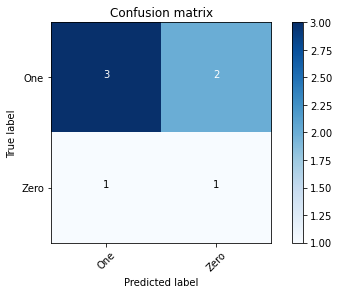

In [ ]:
# Confusion Matrix
class_names = ['One', 'Zero']
y_true = [1,1,0,1,0,1,1]
y_pred = [1,0,1,1,0,1,0]
Week1.basic_metrics(y_true, y_pred, class_names)

## Week 2

### Batch Perceptron Learning

In [ ]:
class BatchPerceptronLearning:
    def fit(X, Y, a, n):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y != 1:
                x = [i * -1 for i in x]
                x.insert(0, -1)
                Norm_Y.append(x)
            else:
                x.insert(0, 1)
                Norm_Y.append(x)

        print("Vectors used in Batch Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))

        # ------------------------------------------------------------------------------------
        # Batch Perceptron Learning Algorithm:

        epoch = 1

        while True:

            updating_samples = []
            print("Epoch {}".format(epoch))

            for count, i in enumerate(range(len(Norm_Y))):

                # Knowing which value of a to use. If it is the first iteration, than use the given parameters in the 
                # question:
                a_prev = a
                print("The value of a used is {}".format(a_prev))
                y_input = Norm_Y[i]
                print("y Value used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("The value of g(x) i.e. a^t*y for this iteration is: {}".format(ay))


                # Checking if the sample is misclassified or not:

                # If sample is misclassified:
                if ay <= 0:

                    # If this is the first sample in the epoch, add the previous value of a to the list of samples used 
                    # for the update to perform summation at the end of the epoch:
                    if count == 0:
                        print("YES, This sample is misclassified. This sample will be used in update.\n")
                        updating_samples.append(np.array(a))
                        updating_samples.append(np.array(y_input))

                    # If sample is misclassified and IS NOT the first sample in the epoch:
                    else:
                        print("YES, This sample is misclassified. This sample will be used in update.\n")
                        updating_samples.append(np.array(y_input))

                # If sample is classified correctly:
                else: 

                    # If first sample in the epoch, append the previous value of a to the updating samples list:
                    if count == 0:
                        updating_samples.append(np.array(a))
                        print("NO, This sample is not mis-classified.\n")
                    else:
                        print("NO, This sample is not mis-classified.")

            # Calculating new value of a after having gone through all of the samples in the dataset since it is Batch Learning.
            a_update_val = n * sum(updating_samples)

            # If Block to check whether learning has converged. If we have gone through all the data without needing 
            # to update the parameters, we can conclude that learning has converged.
            if len(updating_samples) <= 1:
                print("\nLearning has converged.")
                print("Required parameters of a are: {}".format(a))
                break

            # Updating a using our new value of a:
            a = a_update_val
            print("\nNew Value of a^t is: {}.\n".format(a))

            epoch += 1
        
    #def setParams():
        #X_train = transformToList(input("Enter features eg [[1, 5], [2, 5], [4, 1], [5, 1]] 2D:  "))
        #y_train = transformToList(input("Enter labels eg [1, 1, 2, 2] 1D:  "))
        #a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [-25, 6, 3] 1D:  "))
        #lr = float(input("Enter the learning rate eg 1.  "))
        #return X_train, y_train, a, lr

In [ ]:
X_train = [[1,5],[2,5],[4,1],[5,1]]
y_train = [1,1,2,2,2]
a = [-25,6,3]
lr = 1
BatchPerceptronLearning.fit(X_train, y_train, a, lr)

Vectors used in Batch Perceptron Learning Algorithm:
 [[1, 1, 5], [1, 2, 5], [-1, -4, -1], [-1, -5, -1]]

Epoch 1
The value of a used is [-25, 6, 3]
y Value used for this iteration is: [1, 1, 5]
The value of g(x) a^t*y for this iteration is: -4
YES, This sample is misclassified. This sample will be used in update.

The value of a used is [-25, 6, 3]
y Value used for this iteration is: [1, 2, 5]
The value of g(x) a^t*y for this iteration is: 2
NO, This sample is not mis-classified.
The value of a used is [-25, 6, 3]
y Value used for this iteration is: [-1, -4, -1]
The value of g(x) a^t*y for this iteration is: -2
YES, This sample is misclassified. This sample will be used in update.

The value of a used is [-25, 6, 3]
y Value used for this iteration is: [-1, -5, -1]
The value of g(x) a^t*y for this iteration is: -8
YES, This sample is misclassified. This sample will be used in update.


New Value of a^t is: [-26  -2   6].

Epoch 2
The value of a used is [-26  -2   6]
y Value used for th

### Sequential Perceptron Learning with Sample Normalization

In [ ]:
class SequentialPerceptronLearningWithSampleNorm:
    def fit(X, Y, a, n):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y != 1:
                x = [i * -1 for i in x]
                x.insert(0, -1)
                Norm_Y.append(x)
            else:
                x.insert(0, 1)
                Norm_Y.append(x)

        print("Vectors used in Sequential Perceptron Learning Algorithm:\n {}\n".format(Norm_Y))


        # ------------------------------------------------------------------------------------
        # Sequential Perceptron Learning Algorithm:

        epoch = 1

        while True:

            updating_samples = []
            print("Epoch {}".format(epoch))

            # Keeping track of how many samples are correctly classified. If this variable reaches 
            # the value that is equal to the size of the dataset (len), than we know that learning 
            # has converged:
            correctly_classified_counter = 0

            # Going through all of the samples in the dataset one-by-one:
            for i in range(len(Norm_Y)):

                # This chooses which weight to use for an iteration. If first iteration, uses given starting weight 
                # as described in question:
                a_prev = a
                print("The value of a used is {}".format(a_prev))

                # Selecting sample to use:
                y_input = Norm_Y[i]
                print("y Value used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("The value of g(x) i.e. a^t*y for this iteration is: {}".format(ay))


                # Checking if the sample is misclassified or not:

                # If sample is misclassified:
                if ay <= 0:

                    print("This sample is misclassified. This sample will be used in update.\n")
                    updating_samples.append(np.array(a))
                    updating_samples.append(np.array(y_input))

                    # Calculating new value of a using update rule for Sequential Perceptron Learning Algorithm:
                    a_update_val = n * sum(updating_samples)

                    a = a_update_val
                    print("\nNew Value of a^t is: {}.\n".format(a))

                # If the sample is correctly classified:
                else: 
                    print("This sample is classified correctly.\n")
                    correctly_classified_counter += 1
                    pass

                # Reset sample to add for update to occur:
                updating_samples = []

            # If Block to check whether learning has converged. If we have gone through all the data without needing 
            # to update the parameters, we can conclude that learning has converged.
            if correctly_classified_counter == len(Norm_Y):
                print("\nLearning has converged.")
                print("Required parameters of a are: {}.".format(a))
                break

            epoch += 1
        
    # def setParams():
    #     X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
    #     y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
    #     a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [1, 0, 0] 1D:  "))
    #     lr = float(input("Enter the learning rate eg 1.  "))
    #     return X_train, y_train, a, lr

In [ ]:
X_train = [[1,5],[2,5],[4,1],[5,1]]
y_train = [1,1,2,2,2]
a = [-25,6,3]
lr = 1
SequentialPerceptronLearningWithSampleNorm.fit(X_train, y_train, a, lr)

Vectors used in Sequential Perceptron Learning Algorithm:
 [[1, 1, 5], [1, 2, 5], [-1, -4, -1], [-1, -5, -1]]

Epoch 1
The value of a used is [-25, 6, 3]
y Value used for this iteration is: [1, 1, 5]
The value of a^t*y for this iteration is: -4
This sample is misclassified. This sample will be used in update.


New Value of a^t is: [-24   7   8].

The value of a used is [-24   7   8]
y Value used for this iteration is: [1, 2, 5]
The value of a^t*y for this iteration is: 30
This sample is classified correctly.

The value of a used is [-24   7   8]
y Value used for this iteration is: [-1, -4, -1]
The value of a^t*y for this iteration is: -12
This sample is misclassified. This sample will be used in update.


New Value of a^t is: [-25   3   7].

The value of a used is [-25   3   7]
y Value used for this iteration is: [-1, -5, -1]
The value of a^t*y for this iteration is: 3
This sample is classified correctly.

Epoch 2
The value of a used is [-25   3   7]
y Value used for this iteration is

### Sequential Perceptron without sample normalisation






In [ ]:
# Sequential Perceptron Learning Algorithm

# INPUTS:
    # x: data
    # y: target
    # a: initial weights
    # eta: learning rate
    # n_epochs: number of epochs of learning on the entire dataset
    # augmentation: True if data is augmented
    # sample_normalisation: True if sample normalisation applied

def sequential_perceptron_learning_without_norm(x, y, a, eta, n_epochs, augmentation, sample_normalisation):
    n_instances = len(x)
    
    if augmentation:
        x = np.insert(x, 0, 1, axis=1)
    
    if sample_normalisation: # CAREFUL WITH THE DATA LABEL
        x[y==-1] = -x[y==-1]
    
    if sample_normalisation:
        for n in range(n_epochs):
            print("Epoch #{}: ".format(n+1))
            for i in range(n_instances):
                g_x = np.dot(a,x[i])
                print('The value of g(x) i.e. a^t*y for this iteration is:', g_x) 
                if np.sign(np.dot(a, x[i])) <= 0: # only misclassified samples
                    a += eta*x[i]
                print("Sample #{}: {}".format(i+1, a))
            print("End of epoch #{}\n".format(n+1))


    else:
        for n in range(n_epochs):
            print("Epoch #{}: ".format(n+1))
            for i in range(n_instances):
              g_x = np.dot(a,x[i])
              print('The value of g(x) i.e. a^t*y for this iteration is:', g_x)
              if np.sign(np.dot(a, x[i])) != y[i]: # only misclassified samples
                  a += eta*y[i]*x[i]
              print("Sample #{}: {}".format(i+1, a))
            print("End of epoch #{}\n".format(n+1))

    return a

In [ ]:
# Tutorial example (exercise 9)
x = np.array([[0,0],[1,-1],[0.5,0.5],[1,0.5]]) # data
y = np.array( [1,1,-1,-1]) # targets
a = np.array([0.4,1.0,2.0]) # initial weights

# And here we estimate the new vector
a = sequential_perceptron_learning_without_norm(x, y, a, 1, 5, True, False)
print(a) # It should be [1   3   1]

Epoch #1: 
The value of g(x) i.e. a^t*y for this iteration is: 0.4
Sample #1: [0.4 1.  2. ]
The value of g(x) i.e. a^t*y for this iteration is: -0.6000000000000001
Sample #2: [1.4 2.  1. ]
The value of g(x) i.e. a^t*y for this iteration is: 2.9
Sample #3: [0.4 1.5 0.5]
The value of g(x) i.e. a^t*y for this iteration is: 2.15
Sample #4: [-0.6  0.5  0. ]
End of epoch #1

Epoch #2: 
The value of g(x) i.e. a^t*y for this iteration is: -0.6000000000000001
Sample #1: [0.4 0.5 0. ]
The value of g(x) i.e. a^t*y for this iteration is: 0.8999999999999999
Sample #2: [0.4 0.5 0. ]
The value of g(x) i.e. a^t*y for this iteration is: 0.6499999999999999
Sample #3: [-0.6  0.  -0.5]
The value of g(x) i.e. a^t*y for this iteration is: -0.8500000000000001
Sample #4: [-0.6  0.  -0.5]
End of epoch #2

Epoch #3: 
The value of g(x) i.e. a^t*y for this iteration is: -0.6000000000000001
Sample #1: [ 0.4  0.  -0.5]
The value of g(x) i.e. a^t*y for this iteration is: 0.8999999999999999
Sample #2: [ 0.4  0.  -0.5

In [ ]:
def sequential_multiclass_perceptron_learning (N, augmented_matrix, eta, omega, number_of_classes, number_of_features ):
  # N is the number of exemplars provided in the question
  # augmented_matrix is the augmented feature vector from the question
  # eta is the learning rate given in the question
  # omega is an array containing all the output classes of the feature vectors

  N_counter = 0 # counter which keeps track of cases where winner_class == omega[index]

  #Step 2. Initialise aj for each class
  at = np.zeros((number_of_classes, number_of_features))

  for i in range(0,15):
    print ('Iteration: ',i+1)
    # Step 3. Find values of g1, g2 and g3 and then select the arg max of g
    index = i % 5

    #Print updated a^t value
    print('a^t:')
    print(at)
    
    # Compute g value
    g = np.empty([number_of_classes])
    for i in range(len(g)):
      print('Calculation of g values..........')
      print('a^t is:',at[i])
      print('Index is:', index)
      print('Aug matrix is:', augmented_matrix[:,index] )
      g[i] = at[i] @ augmented_matrix[:,index]


    print('g1 | g2 | g3')
    print(g)

    #Step 4. Select the winner
    #Logic for 0,0,0 case and similar ones where 2 gs can produce max value
    seen = []
    bRepeated = False
    # Check if there are multiple max values, and assign the winner class accordingly
    for number in g:
        if number in seen:
          bRepeated = True
          print ("Number repeated!")
          m = max(g)
          temp = [index for index, j in enumerate(g) if j == m]
          winner_class = max(temp) + 1
        else:
            seen.append(number)
    #If all g values are unique, simply select the max value's class as the winner
    if(bRepeated == False):
      g = g.tolist()
      arg_max = max(g)
      winner_class = g.index(arg_max) + 1
    
    print('Winner class = ', winner_class, ', and actual class is:',omega[index])

    #Compare winnner to actual class 
    if(winner_class != omega[index]):
      # Step 4. Apply the update rule as per the algorithm 
      
      #Increment the actual class value which is incorrectly classified 
      at[omega[index]-1] = at[omega[index]-1] + eta * augmented_matrix[:,index]
      print('New loser value:', at[omega[index]-1])

      #Penalize the wrongly predicted Winner class
      at[winner_class-1] = at[winner_class-1] - eta * augmented_matrix[:,index]
      print('New winner value:', at[winner_class-1])

      #Reset counter to 0
      N_counter =0
    else:
      print ('No update is performed!')
      N_counter +=1 #Increment convergence counter which keeps track of cases where winner_class == omega[index]
      if(N_counter == N): ## check for convergence
        print('Value of N = ', N)
        print('Value of N_counter = ', N_counter)
        print('Learning has converged, so stopping...')
        print ('Final values of a^t after update....')
        print('at')
        print(at)
        break
      print ('N counter value = ', N_counter)
    print('at')
    print(at)
    print ('=========================================================')

In [ ]:
N = 5 # N refers to the number of exemplars in the input dataset
eta = 1
input_array = np.array([[ 1,  1,  1,  1],
                        [ 2,  0, -1, -1],
                        [ 0,  2,  1, -1]]) # Input matrix from the question
augmented_matrix = np.insert(input_array,0,1,axis=1)
omega = np.array([1,1,2,2,3]) # Class labels from the question 
number_of_classes = 3
number_of_features = 3

sequential_multiclass_perceptron_learning (N, augmented_matrix, eta, omega, number_of_classes, number_of_features)

Iteration:  1
a^t:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Calculation of g values..........
a^t is: [0. 0. 0.]
Index is: 0
Aug matrix is: [1 1 1]
Calculation of g values..........
a^t is: [0. 0. 0.]
Index is: 0
Aug matrix is: [1 1 1]
Calculation of g values..........
a^t is: [0. 0. 0.]
Index is: 0
Aug matrix is: [1 1 1]
g1 | g2 | g3
[0. 0. 0.]
Number repeated!
Number repeated!
Winner class =  3 , and actual class is: 1
New loser value: [1. 1. 1.]
New winner value: [-1. -1. -1.]
at
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
Iteration:  2
a^t:
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
Calculation of g values..........
a^t is: [1. 1. 1.]
Index is: 1
Aug matrix is: [1 2 0]
Calculation of g values..........
a^t is: [0. 0. 0.]
Index is: 1
Aug matrix is: [1 2 0]
Calculation of g values..........
a^t is: [-1. -1. -1.]
Index is: 1
Aug matrix is: [1 2 0]
g1 | g2 | g3
[ 3.  0. -3.]
Winner class =  1 , and actual class is: 1
No update is performed!
N counter value =  1
at
[[ 1.  1.  1.]
 [ 0.

### Moore-Penrose Pseudoinverse

In [ ]:
class Pseudoinverse:
    def fit(X, Y, b):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y == -1 or y == 2:
                x = [i * -1 for i in x]
                x.insert(0, y)
                Norm_Y.append(x)
            else:
                x.insert(0, y)
                Norm_Y.append(x)

        print("Vectors used in Pseudoinverse operation to calculate parameters of linear discriminant function:\n {}\n".format(Norm_Y))

        # ------------------------------------------------------------------------------------
        # Initialising Y Matrix:
        Y_matrix = []

        # Adding each normalised sample in dataset to Y Matrix:
        for i in range(len(Norm_Y)):
            Y_matrix.append(Norm_Y[i])
        Y_matrix = np.array(Y_matrix)
        print("y Matrix being used:\n {}\n".format(Y_matrix))

        # Calculating pseudo-inverse of Y Matrix:
        pseudo_inv_matrix = np.linalg.pinv(Y_matrix)
        print("Pseudo-inverse Matrix is:\n {}\n".format(pseudo_inv_matrix))

        # Multiplying Pseudo-inverse matrix by given margin vector in question:
        a = np.matmul(pseudo_inv_matrix, b)
        print("a is equal to:\n {}\n".format(a))

        correct_classification = 0

        # Checking if classifications are correct:

        for sample in Norm_Y:
            ay = np.dot(sample, a)
            print("\ng(x) for sample {} is {}".format(sample, ay))

            # Sample is correctly classified if ay is positive:    
            if ay > 0:
                print("Sample has been correctly classified.")
                correct_classification += 1

        if correct_classification == len(Norm_Y):
            print("\nAll samples are classified correctly which means that discriminant function parameters are correct.")

        else:
            print("\nSome samples are misclassified.")
        
    # def setParams():
    #     X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
    #     y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
    #     b = transformToList(input("Enter b eg [1, 1, 1, 1, 1, 1] 1D:  "))
    #     return X_train, y_train, b

In [ ]:
X_train =  [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]]
y_train =  [1,1,1,-1,-1,-1]
b = [1,1,1,1,1,1]
Pseudoinverse.fit(X_train, y_train, b)

Vectors used in Pseudoinverse operation to calculate parameters of linear discriminant function:
 [[1, 0, 2], [1, 1, 2], [1, 2, 1], [-1, 3, -1], [-1, 2, 1], [-1, 3, 2]]

y Matrix being used:
 [[ 1  0  2]
 [ 1  1  2]
 [ 1  2  1]
 [-1  3 -1]
 [-1  2  1]
 [-1  3  2]]

Pseudo-inverse Matrix is:
 [[ 0.0682  0.1648  0.3807  0.1023 -0.233  -0.2557]
 [-0.0341  0.0426  0.1847  0.1989 -0.0085  0.0028]
 [ 0.1402  0.0748 -0.1203 -0.2064  0.1184  0.1828]]

a is equal to:
 [0.2273 0.3864 0.1894]


g(x) for sample [1, 0, 2] is 0.6060606060606065
Sample has been correctly classified.

g(x) for sample [1, 1, 2] is 0.9924242424242433
Sample has been correctly classified.

g(x) for sample [1, 2, 1] is 1.1893939393939406
Sample has been correctly classified.

g(x) for sample [-1, 3, -1] is 0.7424242424242435
Sample has been correctly classified.

g(x) for sample [-1, 2, 1] is 0.7348484848484861
Sample has been correctly classified.

g(x) for sample [-1, 3, 2] is 1.3106060606060626
Sample has been correctl

### Sequential Widrow Hoff Learning Algorithm

In [ ]:
class SequentialWidrowHoff:
    def fit(X, Y, a, b, n, iterations):
        # ------------------------------------------------------------------------------------
        # Applying Sample Normalisation:
        Norm_Y = []

        for x, y in zip(X, Y):

            # If the sample belongs to the class with label 2 or -1 (Check dataset in question to see how formatted):
            if y == -1 or y == 2:
                x = [i * -1 for i in x]
                x.insert(0, y)
                Norm_Y.append(x)
            else:
                x.insert(0, y)
                Norm_Y.append(x)

        print("Vectors used in Sequential Widrow-Hoff Learning Algorithm:\n {}\n".format(Norm_Y))


        # ------------------------------------------------------------------------------------
        # Sequential Widrow-Hoff Learning Algorithm

        # Epoch for-loop:
        for o in range(int(iterations / len(Norm_Y))):

            # This for-loop goes through each sample one-by-one:
            for i in range(len(Norm_Y)):

                # Value of a to use. If first iteration, then uses parameters given in question:

                a_prev = a

                # Which sample to use:
                y_input = Norm_Y[i]
                print("Sample used for this iteration is: {}".format(y_input))

                # Equation -> g(x) = a^{t}y
                ay = np.dot(a, y_input)
                print("g(x) = {}".format(ay))

                # Calculating the values for update:
                update = np.zeros(len(y_input))
                for j in range(len(y_input)): 

                    # Applying Update Rule of Sequential Widrow-Hoff Learning Algorithm:
                    update[j] = n * (b[i] - ay) * y_input[j]

                # Adding update to a:
                a = np.add(a, update)
                print("New Value of a^t is: {}\n".format(a))

        print("Gone through all of the iterations as asked for in question.")
        
    # def setParams():
    #     X_train = transformToList(input("Enter features eg [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]] 2D:  "))
    #     y_train = transformToList(input("Enter labels eg [1, 1, 1, -1, -1, -1] 1D:  "))
    #     a = transformToList(input("Enter a. Usually [1, w1, w2...] eg [1, 0, 0] 1D:  "))
    #     b = transformToList(input("Enter b eg [1, 0.5, 1.5, 1.5, 1.5, 1] 1D:  "))
    #     lr = float(input("Enter the learning rate eg 0.1:  "))
    #     epochs = int(input("Enter the number of epochs eg 12:  "))
    #     return X_train, y_train, a, b, lr, epochs

In [ ]:
X_train = [[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]]
y_train = [1,1,1,-1,-1,-1]
a = [1,0,0]
b = [1,1,1,1,1,1]
lr = 0.1
iterations = 12
SequentialWidrowHoff.fit(X_train, y_train, a, b, lr, iterations)

Vectors used in Sequential Widrow-Hoff Learning Algorithm:
 [[1, 0, 2], [1, 1, 2], [1, 2, 1], [-1, 3, -1], [-1, 2, 1], [-1, 3, 2]]

Sample used for this iteration is: [1, 0, 2]
g(x) = 1
New Value of a^t is: [1. 0. 0.]

Sample used for this iteration is: [1, 1, 2]
g(x) = 1.0
New Value of a^t is: [1. 0. 0.]

Sample used for this iteration is: [1, 2, 1]
g(x) = 1.0
New Value of a^t is: [1. 0. 0.]

Sample used for this iteration is: [-1, 3, -1]
g(x) = -1.0
New Value of a^t is: [ 0.8  0.6 -0.2]

Sample used for this iteration is: [-1, 2, 1]
g(x) = 0.20000000000000012
New Value of a^t is: [ 0.72  0.76 -0.12]

Sample used for this iteration is: [-1, 3, 2]
g(x) = 1.32
New Value of a^t is: [ 0.752  0.664 -0.184]

Sample used for this iteration is: [1, 0, 2]
g(x) = 0.384
New Value of a^t is: [ 0.8136  0.664  -0.0608]

Sample used for this iteration is: [1, 1, 2]
g(x) = 1.3559999999999999
New Value of a^t is: [ 0.778   0.6284 -0.132 ]

Sample used for this iteration is: [1, 2, 1]
g(x) = 1.9028
New

### K nearest neighbor

In [ ]:
def euc_dist (x1,x2,x3,x4):
  euc_dist = math.sqrt( (x1-x3) ** 2 + (x2-x4) ** 2)
  return euc_dist

In [ ]:
euc_dist(0.15,0.35,0.1,0.25)

0.11180339887498945

## Week 3

### Neuron Output (with heavy side function)

In [ ]:
class NeuronOutput:
    def fit(weight, threshold, x):
        summation = []
        for i in range(len(x)):
            summation.append(weight[i] * x[i])

        summation = np.sum(summation, 0) - threshold

        # Find output of neuron by applying heaviside function with given threshold:
        output = np.heaviside(summation, threshold)
        print("Output of neuron with input {} is {}.".format(x, output))
        
    # def setParams():
    #     #This script is based off of Question 2 in Tutorial 3
    #     x = transformToList(input("Enter single sample/input eg [0.1, -0.5, 0.4] 1D:  "))
    #     weights = transformToList(input("Enter weigths from one layer to another eg [0.1, -5, 0.4] 1D:  "))
    #     threshold = float(input("Enter the threshold value eg 0:  "))
    #     return weights, threshold, x

In [ ]:
weights = [0.1,-0.5,0.4]
threshold = 0
x = [0.1,-0.5, 0.4]
NeuronOutput.fit(weights, threshold, x)

x2 = [0.1,0.5,0.4]
NeuronOutput.fit(weights, threshold, x2)

Output of neuron with input [0.1, -0.5, 0.4] is 1.0.
Output of neuron with input [0.1, 0.5, 0.4] is 0.0.


### Sequential Delta Learning


In [ ]:
# Sequential Delta Learning Rule

# INPUTS:
    # x: data
    # y: target
    # w: initial weights
    # eta: learning rate
    # n_epochs: number of epochs
    # augmentation: True if data is augmented
    # sample_normalisation: True if sample normalisation applied
    
def sequential_delta_learning(x, y, w, eta, n_epochs, augmentation, sample_normalisation):
    n_instances = len(x)
    
    if augmentation:
        x = np.insert(x, 0, 1, axis=1)
    
    if sample_normalisation: # CAREFUL WITH THE DATA LABEL
        x[y==-1] = -x[y==-1]
        
    for e in range(n_epochs):
        print("Epoch #{}".format(e+1))
            
        for i in range(n_instances):
            print("Iteration #{}".format(e*n_instances+i+1))

            # y=H(Wx)
            output1 =  np.dot(w, x[i]) # W*x
            if output1 < 0: output=0 
            elif output1 > 0: output=1
            elif output1 == 0: output=0.5 # This means that for the Heaviside function we have H(0)=0.5
            print("y=H(wx)=H({})={}".format(output1, output))

            # Now we update w if there is a difference between t (desired output==y[i]) and y
            t_minus_y = y[i]-output
            print ('t-y = ', t_minus_y)
            eta_t_minus_y = eta*(y[i]-output)*x[i]
            print ('eta_t_minus_y_xt = ', eta_t_minus_y)
            w = w + eta*(y[i]-output)*x[i]
            print("w_new={} \n".format(w))

        print("End of epoch #{} \n".format(e+1))

    return w      

In [ ]:
# Tutorial example (exercise 3)
x = np.array([[0], [1]]) # data
y = np.array([1, 0]) # targets
w = np.array([-1.5, 2]) # initial weights #THIS NEEDS TO BE FORMED FROM THE Q

# And here we estimate the new vector
w = sequential_delta_learning(x, y, w, 1, 6, True, False)
print(w) # It should be [ 0.5 -1. ]

Epoch #1
Iteration #1
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
w_new=[-0.5  2. ] 

Iteration #2
y=H(wx)=H(1.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-1.5  1. ] 

End of epoch #1 

Epoch #2
Iteration #3
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
w_new=[-0.5  1. ] 

Iteration #4
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-1.5  0. ] 

End of epoch #2 

Epoch #3
Iteration #5
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
w_new=[-0.5  0. ] 

Iteration #6
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0]
w_new=[-0.5  0. ] 

End of epoch #3 

Epoch #4
Iteration #7
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
w_new=[0.5 0. ] 

Iteration #8
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-0.5 -1. ] 

End of epoch #4 

Epoch #5
Iteration #9
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
w_new=[ 0.5 -1. ] 

Iteration #10
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0]
w_new=[ 0.5 -1. ] 

End of epoch #5 



### Batch Delta Learning

In [ ]:
# Batch Delta Learning Rule

# INPUTS:
    # x: data
    # y: target
    # w: initial weights
    # eta: learning rate
    # n_epochs: number of epochs
    # augmentation: True if data is augmented
    # sample_normalisation: True if sample normalisation applied
    
def batch_delta_learning(x, y, w, eta, n_epochs, augmentation, sample_normalisation):
    n_instances = len(x)
    
    if augmentation:
        x = np.insert(x, 0, 1, axis=1)
    
    if sample_normalisation: # CAREFUL WITH THE DATA LABEL
        x[y==-1] = -x[y==-1]
        
    for e in range(n_epochs):
        print("Epoch #{}".format(e+1))
        sumando = 0
            
        for i in range(n_instances):
            print("Iteration #{}".format(e*n_instances+i+1))

            # y=H(Wx)
            output1 =  np.dot(w, x[i]) # W*x
            if output1 < 0: output=0 
            elif output1 > 0: output=1
            elif output1 == 0: output=0.5 # This means that for the Heaviside function we have H(0)=0.5
            print("y=H(wx)=H({})={}".format(output1, output))

            t_minus_y = y[i]-output
            print ('t-y = ', t_minus_y)
            eta_t_minus_y = eta*(y[i]-output)*x[i]
            print ('eta_t_minus_y_xt = ', eta_t_minus_y)
            
            sumando += (y[i]-output)*x[i]

        # Now we update w if there is a difference between t (desired output==y[i]) and y
        w = w + eta*sumando
        print("w_new={} \n".format(w))

        print("End of epoch #{} \n".format(e+1))

    return w   

In [ ]:
# Tutorial example (exercise 4)
x = np.array([[0], [1]]) # data
y = np.array([1, 0]) # targets
w = np.array([-1.5, 2]) # initial weights

# And here we estimate the new vector
w = batch_delta_learning(x, y, w, 1, 7, True, False)
print(w) # It should be [ 0.5 -1. ]

Epoch #1
Iteration #1
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
Iteration #2
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-1.5  1. ] 

End of epoch #1 

Epoch #2
Iteration #3
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
Iteration #4
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0]
w_new=[-0.5  1. ] 

End of epoch #2 

Epoch #3
Iteration #5
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
Iteration #6
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-0.5  0. ] 

End of epoch #3 

Epoch #4
Iteration #7
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
Iteration #8
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0]
w_new=[0.5 0. ] 

End of epoch #4 

Epoch #5
Iteration #9
y=H(wx)=H(0.5)=1
t-y =  0
eta_t_minus_y_xt =  [0 0]
Iteration #10
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1]
w_new=[-0.5 -1. ] 

End of epoch #5 

Epoch #6
Iteration #11
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 0]
Iteration #12
y=H(wx)=H(-

In [ ]:
# Tutorial example (exercise 5)
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # data
y = np.array([0, 0, 0, 1]) # targets
w = np.array([0.5, 1, 1]) # initial weights # REMEMBER TO GIVE minus theta here

# And here we estimate the new vector
w = sequential_delta_learning(x, y, w, 1, 5, True, False)
print(w) # It should be [-2.5  2.   1. ]  

Epoch #1
Iteration #1
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1  0  0]
w_new=[-0.5  1.   1. ] 

Iteration #2
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1  0 -1]
w_new=[-1.5  1.   0. ] 

Iteration #3
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[-1.5  1.   0. ] 

Iteration #4
y=H(wx)=H(-0.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 1 1]
w_new=[-0.5  2.   1. ] 

End of epoch #1 

Epoch #2
Iteration #5
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[-0.5  2.   1. ] 

Iteration #6
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1  0 -1]
w_new=[-1.5  2.   0. ] 

Iteration #7
y=H(wx)=H(0.5)=1
t-y =  -1
eta_t_minus_y_xt =  [-1 -1  0]
w_new=[-2.5  1.   0. ] 

Iteration #8
y=H(wx)=H(-1.5)=0
t-y =  1
eta_t_minus_y_xt =  [1 1 1]
w_new=[-1.5  2.   1. ] 

End of epoch #2 

Epoch #3
Iteration #9
y=H(wx)=H(-1.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[-1.5  2.   1. ] 

Iteration #10
y=H(wx)=H(-0.5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[-1.5  2.   1

In [ ]:
# Tutorial example (exercise 6)
x = np.array([[0, 2], [1, 2], [2, 1], [-3, 1], [-2, -1], [-3, -2]]) # data
y = np.array([1, 1, 1, 0, 0, 0]) # targets
w = np.array([1, 0, 0]) # initial weights

# And here we estimate the new vector
w = sequential_delta_learning(x, y, w, 1, 3, True, False)
print(w) # It should be [1 3 1]

Epoch #1
Iteration #1
y=H(wx)=H(1)=1
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 0 0] 

Iteration #2
y=H(wx)=H(1)=1
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 0 0] 

Iteration #3
y=H(wx)=H(1)=1
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 0 0] 

Iteration #4
y=H(wx)=H(1)=1
t-y =  -1
eta_t_minus_y_xt =  [-1  3 -1]
w_new=[ 0  3 -1] 

Iteration #5
y=H(wx)=H(-5)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[ 0  3 -1] 

Iteration #6
y=H(wx)=H(-7)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[ 0  3 -1] 

End of epoch #1 

Epoch #2
Iteration #7
y=H(wx)=H(-2)=0
t-y =  1
eta_t_minus_y_xt =  [1 0 2]
w_new=[1 3 1] 

Iteration #8
y=H(wx)=H(6)=1
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 3 1] 

Iteration #9
y=H(wx)=H(8)=1
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 3 1] 

Iteration #10
y=H(wx)=H(-7)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 3 1] 

Iteration #11
y=H(wx)=H(-6)=0
t-y =  0
eta_t_minus_y_xt =  [0 0 0]
w_new=[1 3 1] 

Iteration #12
y=H(wx)=H(-10)=0
t-y =  0
eta_t_minus_y

### Negative Feedback Networks

In [ ]:
class NegativeFeddbackNetwork:
    def fit(weights, iterations, x, alpha, activations):
        prev_activations = activations
        iteration = 1

        for i in range(iterations):

            print("Iteration {}".format(iteration))

            # Following block deals with calculating first equation: e = x - W^{T}y
            wT = np.array(weights).T
            wTy = np.dot(wT, activations)
            print("value of wTy {}".format(wTy))

            eT = x - wTy
            print("eT: {}".format(eT))
            e = np.array(eT).reshape((eT.shape[0], 1))

            # The following lines deal with calculating the update: y <- y + \alpha*W*e
            We = np.dot(weights, e)
            We = [j for i in We for j in i]
            print("We: {} ".format(We))

            alphaWe = np.dot(alpha, We)

            # Doing the actual update using the second equation:
            y = activations + alphaWe
            print("Value of y: {}".format(y))

            activations = y

            
            wTy = np.dot(wT, activations)
            print("value of wTy with new y{}\n".format(wTy))
            iteration += 1

        print("\nAfter {} iterations, the activation of the output neurons is equal to {}".format(iterations, activations))
        
    # def setParams():
    #     print("This script is based off of Question 7 in Tutorial 3")
    #     x = transformToList(input("Enter single sample/input eg [1, 1, 0] 1D:  "))
    #     weights = transformToList(input("Enter weigths from one layer to another eg [[1, 1, 0], [1, 1, 1]] 2D:  "))
    #     activation = transformToList(input("Enter output layer initial activation eg [0, 0] 1D:  "))
    #     lr = float(input("Enter the learning rate/alpha eg 0.25.  "))
    #     epochs = int(input("Enter the number of epochs eg 5.  "))
    #     return weights, epochs, x, lr, activation
    

In [ ]:
weights = [[1,1,0],[1,1,1]]
epochs = 5
x = [1,1,0]
lr = 0.25
activation = [0,0]
NegativeFeddbackNetwork.fit(weights, epochs, x, lr, activation)

Iteration 1
value of wTy [0 0 0]
eT: [1 1 0]
We: [2, 2] 
Value of y: [0.5 0.5]
value of wTy with new y[1.  1.  0.5]

Iteration 2
value of wTy [1.  1.  0.5]
eT: [ 0.   0.  -0.5]
We: [0.0, -0.5] 
Value of y: [0.5   0.375]
value of wTy with new y[0.875 0.875 0.375]

Iteration 3
value of wTy [0.875 0.875 0.375]
eT: [ 0.125  0.125 -0.375]
We: [0.25, -0.125] 
Value of y: [0.5625 0.3438]
value of wTy with new y[0.9062 0.9062 0.3438]

Iteration 4
value of wTy [0.9062 0.9062 0.3438]
eT: [ 0.0938  0.0938 -0.3438]
We: [0.1875, -0.15625] 
Value of y: [0.6094 0.3047]
value of wTy with new y[0.9141 0.9141 0.3047]

Iteration 5
value of wTy [0.9141 0.9141 0.3047]
eT: [ 0.0859  0.0859 -0.3047]
We: [0.171875, -0.1328125] 
Value of y: [0.6523 0.2715]
value of wTy with new y[0.9238 0.9238 0.2715]


After 5 iterations, the activation of the output neurons is equal to [0.6523 0.2715]


In [ ]:
weights = [[1,1,0],[1,1,1]]
epochs = 5
x = [1,1,0]
lr = 0.5
activation = [0,0]
NegativeFeddbackNetwork.fit(weights, epochs, x, lr, activation)

Iteration 1
value of wTy [0 0 0]
eT: [1 1 0]
We: [2, 2] 
Value of y: [1. 1.]
value of wTy with new y[2. 2. 1.]

Iteration 2
value of wTy [2. 2. 1.]
eT: [-1. -1. -1.]
We: [-2.0, -3.0] 
Value of y: [ 0.  -0.5]
value of wTy with new y[-0.5 -0.5 -0.5]

Iteration 3
value of wTy [-0.5 -0.5 -0.5]
eT: [1.5 1.5 0.5]
We: [3.0, 3.5] 
Value of y: [1.5  1.25]
value of wTy with new y[2.75 2.75 1.25]

Iteration 4
value of wTy [2.75 2.75 1.25]
eT: [-1.75 -1.75 -1.25]
We: [-3.5, -4.75] 
Value of y: [-0.25  -1.125]
value of wTy with new y[-1.375 -1.375 -1.125]

Iteration 5
value of wTy [-1.375 -1.375 -1.125]
eT: [2.375 2.375 1.125]
We: [4.75, 5.875] 
Value of y: [2.125  1.8125]
value of wTy with new y[3.9375 3.9375 1.8125]


After 5 iterations, the activation of the output neurons is equal to [2.125  1.8125]


### REGULATORY FEEDBACK // DIVISIVE INPUT MODULATION

In [ ]:
# Regulatory Feedback // Divisive Input Modulation

# INPUTS:
    # x: input weights
    # y: output weights
    # w: initial weights
    # epsilon: parameters
    # n_epochs: number of epochs
    # augmentation: True if data is augmented
    # sample_normalisation: True if sample normalisation applied

def regulatory_feedforward_network(x, y, w, epsilon, n_epochs, augmentation, sample_normalisation):
    n_instances = len(x)
    
    if augmentation:
        x = np.insert(x, 0, 1, axis=1)
    
    if sample_normalisation: # CAREFUL WITH THE DATA LABEL
        x[y==-1] = -x[y==-1]
    
    w_hat = np.zeros(w.shape)
    for i in range(len(w)):
        w_hat[i] = w[i]/w[i].sum()
        
    for epoch in range(n_epochs):
        print("Epoch #{}".format(epoch+1))
            
        for i in range(n_instances):
            print("Iteration #{}".format(epoch*n_instances+i+1))

            # [Wt*y]epsilon2
            result = np.dot(w.T, y)
            for j in range(len(result)):
                if result[j] < epsilon[1]: result[j]=epsilon[1]
            
            # e = x - wT*y
            e = x[i]/result
            
            # [y]epsilon1
            new_y = np.zeros(y.shape)
            for j in range(len(y)):
                if y[j] < epsilon[0]: new_y[j]=epsilon[0]
                else: new_y[j]=y[j]
            
            # y = new_y * [w_hat*e]
            y = new_y*np.dot(w_hat, e)       

            print("eT = {}\n(W_hat*e)T = {}\n yT = {}\n (WTy)T = {}".format(e, np.dot(w_hat, e), y, np.dot(w.T, y)))

        print("End of epoch #{} \n".format(epoch+1))

    return e, y, w

In [ ]:
# Tutorial example (exercise 9)
x = np.array([[1., 1., 0.]]) # inputs
y = np.array([0., 0.]) # outputs
w = np.array([[1., 1., 0.], [1., 1., 1.]]) # weights
epsilon = np.array([0.01, 0.01])

# And here we estimate the new values
e, y, w = regulatory_feedforward_network(x, y, w, epsilon, 5, False, False)
print("e: {}\ny: {}\nw: {}".format(e, y, w)) # It should be y: [0.83505  0.10997]

Epoch #1
Iteration #1
eT = [100. 100.   0.]
(W_hat*e)T = [100.      66.6667]
 yT = [1.     0.6667]
 (WTy)T = [1.6667 1.6667 0.6667]
End of epoch #1 

Epoch #2
Iteration #2
eT = [0.6 0.6 0. ]
(W_hat*e)T = [0.6 0.4]
 yT = [0.6    0.2667]
 (WTy)T = [0.8667 0.8667 0.2667]
End of epoch #2 

Epoch #3
Iteration #3
eT = [1.1538 1.1538 0.    ]
(W_hat*e)T = [1.1538 0.7692]
 yT = [0.6923 0.2051]
 (WTy)T = [0.8974 0.8974 0.2051]
End of epoch #3 

Epoch #4
Iteration #4
eT = [1.1143 1.1143 0.    ]
(W_hat*e)T = [1.1143 0.7429]
 yT = [0.7714 0.1524]
 (WTy)T = [0.9238 0.9238 0.1524]
End of epoch #4 

Epoch #5
Iteration #5
eT = [1.0825 1.0825 0.    ]
(W_hat*e)T = [1.0825 0.7216]
 yT = [0.8351 0.11  ]
 (WTy)T = [0.945 0.945 0.11 ]
End of epoch #5 

e: [1.0825 1.0825 0.    ]
y: [0.8351 0.11  ]
w: [[1. 1. 0.]
 [1. 1. 1.]]


## Week 5

In [ ]:
# tanh
round (math.tanh(1), 4)

0.7616

### Batch Normalisation

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def batch_normalization(batch, beta, gamma, epsilon):
    mean = np.zeros(batch[0].shape)
    for X in batch:
        mean = mean + X
    mean = mean / len(batch)

    variance = np.zeros(batch[0].shape)
    for X in batch:
        variance = variance + (X - mean) ** 2
    variance = variance / len(batch)

    batch_normalized = list()
    for X in batch:
        batch_normalized.append(beta + gamma * (X - mean) / np.sqrt(variance + epsilon))

    return batch_normalized

In [ ]:
X1 = np.array([[1, 0.5, 0.2], [-1, -0.5, -0.2], [0.1, -0.1, 0]])
X2 = np.array([[1, -1, 0.1], [0.5, -0.5, -0.1], [0.2, -0.2, 0]])
X3 = np.array([[0.5, -0.5, -0.1], [0, -0.4, 0], [0.5, 0.5, 0.2]])
X4 = np.array([[0.2, 1, -0.2], [-1, -0.6, -0.1], [0.1, 0, 0.1]])
beta = 0
gamma = 1
epsilon = 0.1

# ---------------------
for i, a in enumerate(batch_normalization((X1, X2, X3, X4), beta, gamma, epsilon)):
    print(f"X{i+1}:\n {a}\n")

X1:
 [[ 0.69787657  0.58722022  0.56568542]
 [-0.86516068  0.         -0.3086067 ]
 [-0.3509312  -0.36115756 -0.22941573]]

X2:
 [[ 0.69787657 -1.17444044  0.28284271]
 [ 1.21122495  0.          0.        ]
 [-0.07018624 -0.60192927 -0.22941573]]

X3:
 [[-0.37577969 -0.58722022 -0.28284271]
 [ 0.51909641  0.3086067   0.3086067 ]
 [ 0.77204865  1.08347268  0.38235956]]

X4:
 [[-1.01997344  1.17444044 -0.56568542]
 [-0.86516068 -0.3086067   0.        ]
 [-0.3509312  -0.12038585  0.07647191]]



### Convolution Layer (padding, stride, dilation)

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def convolution_layer(feature_maps, mask_channels, padding, stride, dilation):
    nh, nw = feature_maps[0].shape
    mh, mw = mask_channels[0].shape
    nh_out, nw_out = int((nh + 2 * padding - mh ) / stride) + 1 - (dilation - 1), int((nw + 2 * padding - mw ) / stride) + 1 - (dilation - 1)
    out = np.zeros((nh_out, nw_out))
    for i in range(nh_out):
        for j in range(nw_out):
            for X, H in zip(feature_maps, mask_channels):
                X = np.pad(X, padding)
                if stride != 0:
                    i_start = i * stride
                    j_start = j * stride
                else:
                    i_start = i
                    j_start = j
                i_end = i_start + mh * dilation - dilation + 1
                j_end = j_start + mw * dilation - dilation + 1
                out[i, j] = out[i, j] + np.sum(X[i_start:i_end:dilation, j_start:j_end:dilation] * H)
    return out

In [ ]:
# Initialise your matrices that needs to go through the convolutional layer
feature_maps = list()
feature_maps.append(np.array([[1.0, 0, 2], [0.4,-0.7,0.7], [0.6,-0.6,0.6]]))
feature_maps.append(np.array([[1, -1, 0.6], [0.6, -0.5,0.7], [1,-0.4,0.7]]))

# Initialise the masks
mask_channels = list()
mask_channels.append(np.array([[7.2,1.5], [-0.8,4.9]]))
mask_channels.append(np.array([[3.1,-9.5], [1.7,7.7]]))

#Set the desired padding, stride, and dilation
padding = 1 # NOTE padding should be set to 0 if not provided
stride = 2 # NOTE stride should be set to 1 if not provided
dilation = 1 # NOTE dilation should be set to 1 if not provided

#----------------------------------------------------------------------------#
convolution_layer(feature_maps, mask_channels, padding=padding, stride=stride, dilation=dilation)

array([[12.6 , 12.72],
       [ 5.54, -4.06]])

###  Convolution Layer (pooling)

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=8)

def pooling_layer(feature_maps, pool_size, stride, pooling='max'):
    nh, nw = feature_maps[0].shape
    nh_out, nw_out = int((nh - pool_size[0]) / stride) + 1, int((nw - pool_size[1]) / stride) + 1
    out_maps = list()
    for X in feature_maps:
        out = np.zeros((nh_out, nw_out))
        for i in range(nh_out):
            for j in range(nw_out):
                i_start = i * stride
                j_start = j * stride
                i_end = i_start + pool_size[0]
                j_end = j_start + pool_size[1]
                if pooling == 'avg':
                    out[i, j] = np.average(X[i_start:i_end, j_start:j_end])
                else:
                    out[i, j] = np.max(X[i_start:i_end, j_start:j_end])
        out_maps.append(out)
    return(out_maps)

In [ ]:

# Enter the matrix to apply pooling on.
feature_maps = list()
feature_maps.append(np.array([[0.2, 1, 0, 0.4], [-1, 0, -0.1, -0.1], [0.1, 0, -1, -0.5], [0.4, -0.7, -0.5, 1]]))

#Set the desired stride and pooling
stride = 2 # NOTE stride should be set to 1 if not provided
pooling = 'max' # It can be either 'avg' or 'max'

# Set the dimension of the pooling
x1 = 2
x2 = 2 # This is a 2x2 pooling

#-------------------------------------------------------------------#
output = pooling_layer(feature_maps, (x1, x2), stride=stride, pooling=pooling)
print(output)

[array([[1. , 0.4],
       [0.4, 1. ]])]


### Convolution Layer - output size

In [ ]:
def get_output_size(input_size, mask_size, padding, stride, dilation=1):
    (nh, nw, nc) = input_size
    (mh, mw, mc) = mask_size
    nh_out, nw_out = int((nh + 2 * padding - mh) / stride) + 1 - (dilation - 1), int(
        (nw + 2 * padding - mw) / stride) + 1 - (dilation - 1)
    return (nh_out, nw_out, mc)

In [ ]:
# NOTE This only works for single masks and not for concatenations of CNN. For that, look at the image below


input_size = (11, 15, 6) # hight x width x feature maps 
mask_size = (3, 3, 1) # hight x width x channels

output_size = get_output_size(input_size, mask_size, padding=0, stride=2)
print(output_size)

(5, 7, 1)


## Week 7 - Feature Extraction


###  Karhunen-Loève Transform PCA

In [ ]:
# Karhunen-Loève Transform (KLT) -> For PCA 

# INPUT:
    # data: pd.DataFrame with instances as rows and values as columns 

def karhunen_pd(data):
    
    # First we calculate the mean of each column
    means = np.zeros(len(data.columns))# for all columns
    for i in range(len(data.columns)):
        means[i] = data.iloc[:, i].mean()
    
    mean_zero = np.zeros(data.shape)
    # Now we substract the corresponding mean to all the values of our dataset
    for j in range(len(data)): # for all instances
        mean_zero[j, :] = data.iloc[j, :] - means
        
    # Now we have to calculate the covariance matrix
    cov = np.zeros((len(data.columns), len(data.columns)))
    for i in range(len(data)): # for all instances
        cov += np.array([mean_zero[i, :]]).T*mean_zero[i, :]
    cov = cov/len(data) # This is our final covariance matrix
    
    # Lastly, we obtain the eigenvalues and its corresponding eigenvectors
    eigenVal, eigenVec = np.linalg.eig(cov)
    
    return means, cov, eigenVal, eigenVec

# Karhunen-Loève Transform (KLT) -> For PCA 

# INPUT:
    # data: np.array with instances as rows and values ascolumns 

def karhunen_np(data):
    
    # First we calculate the mean of each row
    means = x.mean(axis=1)
    
    mean_zero = np.zeros(data.shape)
    # Now we substract the corresponding mean to all the values of our dataset
    for j in range(data.shape[1]): # for all instances
        mean_zero[:, j] = data[:, j] - means
        
    # Now we have to calculate the covariance matrix
    cov = np.zeros((data.shape[0],data.shape[0]))
    for i in range(x.shape[1]): # for all instances
        cov += np.array([mean_zero[:, i]]).T*mean_zero[:, i]
    cov = cov/x.shape[1] # This is our final covariance matrix
    
    # Lastly, we obtain the eigenvalues and its corresponding eigenvectors
    eigenVal, eigenVec = np.linalg.eig(cov)
    
    return means, mean_zero, cov, eigenVal, eigenVec

In [ ]:
# Tutorial example (exercise 4)
x = np.array([[1., 2., 1.], [2, 3., 1.], [3., 5., 1.], [2., 2., 1.]]).T # input data

means, mean_zero, cov, eigenVal, eigenVec = karhunen_np(x)

print("Means: {}\n\nCovariance Matrix: \n{}\n\nEigenValues: {}\n\nEigenVectors: \n{}".format(means, cov, eigenVal, eigenVec))

# We choose the two largest:
val = np.array([eigenVal[1], eigenVal[0]])
v = np.array([eigenVec[:, 1], eigenVec[:, 0]]).T
print("\n\nEigenValues for the 2 first principal components: {}\n\nEigenVectors for the 2 first principal components: \n{}".format(val, v))

# Now, for a point you use: 
y = np.dot(v.T, mean_zero)
print("\n\nPoint before PCA: \n{}\n\nPoint with mean zero: \n{}\n\nProjection into the two first principal components: \n{}".format(np.array(x), mean_zero, y))

# Now we have to calculate the covariance matrix
cov = np.zeros((y.shape[0],y.shape[0]))
for i in range(y.shape[1]): # for all instances
    cov += np.array([y[:, i]]).T*y[:, i]
cov = cov/y.shape[1] # This is our final covariance matrix
print("\nNew covariance matrix: \n{}".format(cov))

Means: [2. 3. 1.]

Covariance Matrix: 
[[0.5  0.75 0.  ]
 [0.75 1.5  0.  ]
 [0.   0.   0.  ]]

EigenValues: [0.0986 1.9014 0.    ]

EigenVectors: 
[[-0.8817 -0.4719  0.    ]
 [ 0.4719 -0.8817  0.    ]
 [ 0.      0.      1.    ]]


EigenValues for the 2 first principal components: [1.9014 0.0986]

EigenVectors for the 2 first principal components: 
[[-0.4719 -0.8817]
 [-0.8817  0.4719]
 [ 0.      0.    ]]


Point before PCA: 
[[1. 2. 3. 2.]
 [2. 3. 5. 2.]
 [1. 1. 1. 1.]]

Point with mean zero: 
[[-1.  0.  1.  0.]
 [-1.  0.  2. -1.]
 [ 0.  0.  0.  0.]]

Projection into the two first principal components: 
[[ 1.3535  0.     -2.2352  0.8817]
 [ 0.4098  0.      0.062  -0.4719]]

New covariance matrix: 
[[ 1.9014 -0.    ]
 [-0.      0.0986]]


In [ ]:
from sklearn.decomposition import PCA

# Tutorial example (exercise 6)
x = pd.DataFrame([[0., 1.], [3., 5.], [5., 4.], [5., 6.], [8., 7.], [9., 7.]]) # input data

means, cov, eigenVal, eigenVec = karhunen_pd(x)

print("Means: {}\n\nCovariance Matrix: \n{}\n\nEigenValues: {}\n\nEigenVectors: \n{}".format(means, cov, eigenVal, eigenVec))

print("\nPoints with zero mean: \n{}".format(np.array(x-means)))

# We choose the two largest:
val = np.array(eigenVal[0])
v = np.array(eigenVec[:, 0]).T
print("\n\nEigenValues for the first principal component: {}\n\nEigenVectors for the first principal component: \n{}".format(val, v))

# Now, for a point you use: 
y = np.dot(v.T, (x - means).T)
print("\n\nPoint before PCA: \n{}\n\nPoint with mean zero: \n{}\n\nProjection into the two first principal components: \n{}".format(np.array(x), np.array(x - means), y))

# FASTER WAY TO DO IT WITH SCIKIT LEARN
pca=PCA(n_components=2)
ytest=pca.fit(x).transform(np.array(x)) # for the first point
print("\n\nNew Points: \n{}".format(ytest.T))

# New covariance matrix for this dataset
print("\n\nCovariance matrix of new dataset: \n{}".format(np.cov(y)))

Means: [5. 5.]

Covariance Matrix: 
[[9.     5.6667]
 [5.6667 4.3333]]

EigenValues: [12.7949  0.5384]

EigenVectors: 
[[ 0.8309 -0.5564]
 [ 0.5564  0.8309]]

Points with zero mean: 
[[-5. -4.]
 [-2.  0.]
 [ 0. -1.]
 [ 0.  1.]
 [ 3.  2.]
 [ 4.  2.]]


EigenValues for the first principal component: 12.79492543695008

EigenVectors for the first principal component: 
[0.8309 0.5564]


Point before PCA: 
[[0. 1.]
 [3. 5.]
 [5. 4.]
 [5. 6.]
 [8. 7.]
 [9. 7.]]

Point with mean zero: 
[[-5. -4.]
 [-2.  0.]
 [ 0. -1.]
 [ 0.  1.]
 [ 3.  2.]
 [ 4.  2.]]

Projection into the two first principal components: 
[-6.3802 -1.6618 -0.5564  0.5564  3.6055  4.4364]


New Points: 
[[ 6.3802  1.6618  0.5564 -0.5564 -3.6055 -4.4364]
 [-0.5414  1.1129 -0.8309  0.8309 -0.0075 -0.564 ]]


Covariance matrix of new dataset: 
15.353910524340101


### Oja's rule

In [ ]:
# Oja's Learning rule 
# through Mizan 
# this code works out zero-mean data so please enter the raw feature vectors as given in the question
# Tutorial 7, question 7

## -----------------------------------------------------------------------
# ONLY CHANGE THESE 3 INPUTS AND CHANGE THE NUMBER OF EPOCH YOU WANT WHEN APPLYING THE FUNCTION(Oja_learning_rule)
input_from_question = np.array([[[0,1]],[[3,5]],[[5,4]],[[5,6]],[[8,7]],[[9,7]]])
weight_x = np.array([[-1,0]])
learning_rate = 0.01
epochs = 6
## -----------------------------------------------------------------------

# we are going to perform Oja's learning on the input_vectors
input_vectors = []

mean_of_data = input_from_question.mean(axis=0)
for i in input_from_question:
    zero_mean_data = i - mean_of_data
    input_vectors.append(zero_mean_data)
    

def Oja_learning_rule(epoch):
    weight_update = np.copy(weight_x)  
    for i in range(1,epoch+1):
        df = pd.DataFrame({"x": [i for i in input_vectors]})
        df['y'] = df['x'].apply(lambda x: np.dot(x,weight_update.T))
        df['x - yw'] = df['x'].apply(lambda x: np.round(x, 4)) - df['y'].apply(lambda y: y * (weight_update))  
        df['ny(x -yw)'] = learning_rate * df['y'].apply(lambda y: y) * df['x - yw'].apply(lambda x: x)
        #Rounding the numbers         
        df['y'] = df['y'].apply(lambda y: np.round(y,4))
        df['x - yw'] =  df['x - yw'].apply(lambda x: np.round(x,4))
        df['ny(x -yw)']  = df['ny(x -yw)'].apply(lambda x: np.round(x,4))
        sum_of_weights = df['ny(x -yw)'].sum()
        weight_update = weight_update + sum_of_weights   
        display(df)
        print(f'after {i} epoch Total weight change is: {sum_of_weights}')
        print(f'after {i} epoch our weights are: {weight_update}')


Oja_learning_rule(epochs)

,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[5.0]],"[[0.0, -4.0]]","[[0.0, -0.2]]"
1,"[[-2.0, 0.0]]",[[2.0]],"[[0.0, 0.0]]","[[0.0, 0.0]]"
2,"[[0.0, -1.0]]",[[0.0]],"[[0.0, -1.0]]","[[0.0, -0.0]]"
3,"[[0.0, 1.0]]",[[0.0]],"[[0.0, 1.0]]","[[0.0, 0.0]]"
4,"[[3.0, 2.0]]",[[-3.0]],"[[0.0, 2.0]]","[[-0.0, -0.06]]"
5,"[[4.0, 2.0]]",[[-4.0]],"[[0.0, 2.0]]","[[-0.0, -0.08]]"


after 1 epoch Total weight change is: [[ 0.   -0.34]]
after 1 epoch our weights are: [[-1.   -0.34]]


,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[6.36]],"[[1.36, -1.8376]]","[[0.0865, -0.1169]]"
1,"[[-2.0, 0.0]]",[[2.0]],"[[0.0, 0.68]]","[[0.0, 0.0136]]"
2,"[[0.0, -1.0]]",[[0.34]],"[[0.34, -0.8844]]","[[0.0012, -0.003]]"
3,"[[0.0, 1.0]]",[[-0.34]],"[[-0.34, 0.8844]]","[[0.0012, -0.003]]"
4,"[[3.0, 2.0]]",[[-3.68]],"[[-0.68, 0.7488]]","[[0.025, -0.0276]]"
5,"[[4.0, 2.0]]",[[-4.68]],"[[-0.68, 0.4088]]","[[0.0318, -0.0191]]"


after 2 epoch Total weight change is: [[ 0.1457 -0.156 ]]
after 2 epoch our weights are: [[-0.8543 -0.496 ]]


,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[6.2555]],"[[0.3441, -0.8973]]","[[0.0215, -0.0561]]"
1,"[[-2.0, 0.0]]",[[1.7086]],"[[-0.5403, 0.8475]]","[[-0.0092, 0.0145]]"
2,"[[0.0, -1.0]]",[[0.496]],"[[0.4237, -0.754]]","[[0.0021, -0.0037]]"
3,"[[0.0, 1.0]]",[[-0.496]],"[[-0.4237, 0.754]]","[[0.0021, -0.0037]]"
4,"[[3.0, 2.0]]",[[-3.5549]],"[[-0.037, 0.2368]]","[[0.0013, -0.0084]]"
5,"[[4.0, 2.0]]",[[-4.4092]],"[[0.2332, -0.187]]","[[-0.0103, 0.0082]]"


after 3 epoch Total weight change is: [[ 0.0075 -0.0492]]
after 3 epoch our weights are: [[-0.8468 -0.5452]]


,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[6.4148]],"[[0.4321, -0.5027]]","[[0.0277, -0.0322]]"
1,"[[-2.0, 0.0]]",[[1.6936]],"[[-0.5659, 0.9234]]","[[-0.0096, 0.0156]]"
2,"[[0.0, -1.0]]",[[0.5452]],"[[0.4617, -0.7028]]","[[0.0025, -0.0038]]"
3,"[[0.0, 1.0]]",[[-0.5452]],"[[-0.4617, 0.7028]]","[[0.0025, -0.0038]]"
4,"[[3.0, 2.0]]",[[-3.6308]],"[[-0.0746, 0.0205]]","[[0.0027, -0.0007]]"
5,"[[4.0, 2.0]]",[[-4.4776]],"[[0.2084, -0.4412]]","[[-0.0093, 0.0198]]"


after 4 epoch Total weight change is: [[ 0.0165 -0.0051]]
after 4 epoch our weights are: [[-0.8303 -0.5503]]


,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[6.3527]],"[[0.2746, -0.5041]]","[[0.0174, -0.032]]"
1,"[[-2.0, 0.0]]",[[1.6606]],"[[-0.6212, 0.9138]]","[[-0.0103, 0.0152]]"
2,"[[0.0, -1.0]]",[[0.5503]],"[[0.4569, -0.6972]]","[[0.0025, -0.0038]]"
3,"[[0.0, 1.0]]",[[-0.5503]],"[[-0.4569, 0.6972]]","[[0.0025, -0.0038]]"
4,"[[3.0, 2.0]]",[[-3.5915]],"[[0.018, 0.0236]]","[[-0.0006, -0.0008]]"
5,"[[4.0, 2.0]]",[[-4.4218]],"[[0.3286, -0.4333]]","[[-0.0145, 0.0192]]"


after 5 epoch Total weight change is: [[-0.003 -0.006]]
after 5 epoch our weights are: [[-0.8333 -0.5563]]


,x,y,x - yw,ny(x -yw)
0,"[[-5.0, -4.0]]",[[6.3917]],"[[0.3262, -0.4443]]","[[0.0208, -0.0284]]"
1,"[[-2.0, 0.0]]",[[1.6666]],"[[-0.6112, 0.9271]]","[[-0.0102, 0.0155]]"
2,"[[0.0, -1.0]]",[[0.5563]],"[[0.4636, -0.6905]]","[[0.0026, -0.0038]]"
3,"[[0.0, 1.0]]",[[-0.5563]],"[[-0.4636, 0.6905]]","[[0.0026, -0.0038]]"
4,"[[3.0, 2.0]]",[[-3.6125]],"[[-0.0103, -0.0096]]","[[0.0004, 0.0003]]"
5,"[[4.0, 2.0]]",[[-4.4458]],"[[0.2953, -0.4732]]","[[-0.0131, 0.021]]"


after 6 epoch Total weight change is: [[0.0031 0.0008]]
after 6 epoch our weights are: [[-0.8302 -0.5555]]


### Fisher's method

In [ ]:
import numpy as np


def fishers(ip, weights, classes):
    ip = np.array(ip)
    N, D = ip.shape
    weights = np.array(weights)
    m1 = []
    m2 = []
    for idx in range(N):
        if classes[idx] == 1:
            m1.append(ip[idx])
        else:
            m2.append(ip[idx])
    m1 = np.mean(m1, axis=0)
    m2 = np.mean(m2, axis=0)

    # between cluster distance
    sb = []
    sw = []
    for w in (weights):
        d = (w @ (m1-m2)) ** 2
        sb.append(d)
    # calculate within cluster distance
    sw = []
    for w in weights:
        running_sw = 0
        for idx in range(len(ip)):
            if classes[idx] == 1:
                running_sw += (w.T @ (ip[idx] - m1)) ** 2

            elif classes[idx] == 2:
                running_sw += (w.T @ (ip[idx] - m2)) ** 2
        sw.append(running_sw)
        # print(running_sw)
    print("SB: ")
    print(sb)
    print("SW: ")
    print(sw)
    cost = []
    for _sb, _sw in zip(sb, sw):
        cost.append(_sb/_sw)
    print("Cost: ")
    print(cost)

    print("-"*100)
    print(f"{weights[np.argmax(cost)]} has high PROJECTION COST")


In [ ]:
ip = [[1, 2], [2, 1], [3, 3], [6, 5], [7, 8]]
classes = [1, 1, 1, 2, 2]
weights = [[-1, 5], [2, -3]]
fishers(ip, weights, classes)

SB: 
[324.0, 20.25]
SW: 
[140.0, 38.5]
Cost: 
[2.3142857142857145, 0.525974025974026]
----------------------------------------------------------------------------------------------------
[-1  5] has high PROJECTION COST


### Sparse coding

In [ ]:
import numpy as np


def main(p, VT, x, _lambda):
    p = np.array(p)
    VT = np.array(VT)
    x = np.array(x)
    r_error = []
    for p in projections:
        val = x - VT @ p
        r_error.append(np.linalg.norm(val) + _lambda*np.count_nonzero(p))
    print("RECONSTRUCTION ERRORS: ")
    print(r_error)
    print(projections[np.argmin(r_error)], " for sparse coding")


In [ ]:
# REPLACE ACCORDING TO THE QUESTION
# projections are nothing but y

projections = [[0,-1.4,0,0], [1.6,-1.0,0,0]]
x = [[2.4, 4.3]]
VT = [[1.6, -0.1, 4.6, -1.9], [1.4,-2.9,-0.7,8.3]]
main(p=projections, VT=VT, x=x, _lambda=1)

RECONSTRUCTION ERRORS: 
[3.272707636278806, 2.8793179174792245]
[1.6, -1.0, 0, 0]  for sparse coding


## Week 8

### SVM

In [ ]:
class SVM:
    def fit(X, y, support_vectors, support_vector_class):
        X = np.array(X)
        y = np.array(y)

        print("-"*100)
        w = []
        for idx in range(len(support_vectors)):
            w.append(support_vectors[idx] * support_vector_class[idx])
        w = np.array(w)
        eq_arr = []
        for idx, sv in enumerate(support_vectors):
            tmp = ((w @ sv) * support_vector_class[idx])
            tmp = np.append(tmp, [support_vector_class[idx]])
            eq_arr.append(tmp)
        eq_arr.append(np.append(support_vector_class, [0]))
        rhs_arr = [1] * len(support_vector_class)
        rhs_arr.extend([0])
        rhs_arr = np.array(rhs_arr)
        ans = rhs_arr @ np.linalg.inv(eq_arr)
        print("lambda and w_0 values are ", ans)
        final_weight = []
        for idx in range(w.shape[0]):
            final_weight.append(w[idx] * ans[idx])
        final_weight = np.array(final_weight)
        final_weight = np.sum(final_weight, axis=0)
        print("Weights: ")
        print(final_weight)
        print("Margin: ")
        print(2/np.linalg.norm(final_weight))
        print("-"*100)
            
    def setParams():
        X = transformToList(input("Enter features eg [[3, 1], [3, -1], [7, 1], [8, 0], [1, 0], [0, 1], [-1, 0], [-2, 0]] 2D:  "))
        y = transformToList(input("Enter labels eg [1, 1, 1, 1, -1, -1, -1, -1] 1D:  "))
        support_vectors = np.array(transformToList(input("Enter features eg [[3, 1], [3, -1], [1, 0]] 2D:  "))).astype(np.float)
        support_vector_class = np.array(transformToList(input("Enter labels eg [1, 1, -1] 1D:  "))).astype(np.float)
            
        return X, y, support_vectors, support_vector_class

In [ ]:
X, y, support_vectors, support_vector_class = SVM.setParams()
SVM.fit(X, y, support_vectors, support_vector_class)

Enter features eg [[3, 1], [3, -1], [7, 1], [8, 0], [1, 0], [0, 1], [-1, 0], [-2, 0]] 2D:  [1]
Enter labels eg [1, 1, 1, 1, -1, -1, -1, -1] 1D:  [-1,-1,+1]
Enter features eg [[3, 1], [3, -1], [1, 0]] 2D:  [6,9,8]
Enter labels eg [1, 1, -1] 1D:  [-1,-1,+1]
----------------------------------------------------------------------------------------------------


ValueError: ignored

## Week 9

### AdaBoost

In [ ]:
import math
import numpy as np

# NOTE you can use if for Q1 c in tutorial9

def run_adaBooster_setup():
    """ Ask the user to enter the needed parameters
    """  
    print("Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. \nBe careful not to enter spaces after the coma that separates the samples' coordinates.\n")
    print("I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3 \n")
    dataset_input = str(input())
    dataset = np.array([]).reshape(0,2)
    samples = dataset_input.split(' ')
    for sample in samples:
        coordinates = sample.split(',')
        coordinates = np.array([float(c) for c in coordinates])
        dataset = np.concatenate((dataset, [coordinates]))
    print("\n")
    print("Please insert the labels (y) of each sample in the dataset. \nYou should provide a sequential list of y where each y is separated by a single space.")
    print("I.E. +1 -1 +1 -1")
    labels = [ int(o) for o in str(input()).split(' ')] 
    print("\n")
    print("Please insert the number of weak classifiers:")
    n_classifiers = int(input())
    print("\n")
    thresholds = np.array([])
    for i in range(0, n_classifiers):
        print(f"Please insert the decision threshold for weak classifier {i+1} so that it classify a sample to be +1:")
        print("I.E.: x1 > 0")
        print("I.E.: x2 > 3")
        print("I.E.: x1 >= -4")
        thresholds = np.concatenate((thresholds, [str(input())]))
        print('\n')
    print("Please enter the target training error (when the adaboost should terminate). This should be normalised to the total number of samples:")
    print("I.E.: 0 -> if you want to stop it when the classifier classifies correctly all the training samples.")
    print("I.E.: 0.25 -> if you want to stop it when the classifier classifies correctly 75\% of the samples.")
    target_error = float(input())
    print("\n")
    print("Please enter the maximum number of iterations you want the algorithm to run for:")
    max_iterations = int(input())
    print("\n")
    return dataset, labels, n_classifiers, thresholds, target_error, max_iterations


# Decision stump used as weak classifier
class DecisionStump():
    def __init__(self, id, threshold=None):
        self.threshold = threshold
        self.id = id


    def predict(self, sample):
        if '>' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] > float(terms[2]):
                return 1
            else:
                return -1
        elif '<' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] < float(terms[2]):
                return 1
            else:
                return -1
        elif '<=' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] <= float(terms[2]):
                return 1
            else:
                return -1
        elif '>=' in self.threshold:
            terms = self.threshold.split(' ')
            axis_in_condition = [int(c) - 1 for c in terms[0] if c.isdigit()]
            if sample[axis_in_condition[0]] >= float(terms[2]):
                return 1
            else:
                return -1


class Adaboost():

    def __init__(self, n_clf, thresholds, target_error, max_iterations=10):
        self.n_clf = n_clf
        self.clfs = np.array([])
        for i in range (0, len(thresholds)):
            self.clfs = np.concatenate(( self.clfs, [DecisionStump(i+1, thresholds[i])] ))
        # self.alpha = 0
        self.alpha = []
        self.target_error = target_error
        self.max_iterations = max_iterations
        self.best_classifiers = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        iteration = 1
        while True:
            print(f"Iteration {iteration}: \nWeights: {w}")

            # Iterate through classifiers and find the best one
            lowest_error = 100000000
            best_classifier = 0
            for i in range(0, self.n_clf):
                clf = self.clfs[i]
                # Calculate Error
                err = 0
                for j, sample in enumerate(X):
                    prediction = clf.predict(sample)
                    error = 0 if prediction == y[j] else 1
                    err += error * w[j]
                if err < lowest_error:
                    lowest_error = err
                    best_classifier = i

            self.best_classifiers.append(self.clfs[best_classifier])
            print(f"Best classifier: {best_classifier+1}")

            # Get predictions from best classifer for each sample
            predictions = []
            for j, sample in enumerate(X):
                prediction = self.clfs[best_classifier].predict(sample)
                predictions.append(prediction)

            # Calculate weighted training error of best classifier
            weighted_error = 0
            for i, prediction in enumerate(predictions):
                # error += 0 if prediction == y[i] else 1
                w_e = 0 if prediction == y[i] else 1
                w_e *= w[i]
                weighted_error += w_e
            error /= len(y)
            print(f"Best classifier's weighted training error: {weighted_error}")


            # Calculate Alpha
            EPS = 1e-10
            alpha = 0.5 * np.log((1.0 - lowest_error) / (lowest_error))
            self.alpha.append(alpha)
            print(f"Alpha: {alpha}")

            # Calculate weights for next iteration
            new_w = []
            for i, weight in enumerate(w):
                new_w.append(w[i] * (np.exp(- alpha * y[i] * predictions[i])))
                print(f"Update weight: W{iteration}(sample{i+1})*e^-alpha{iteration}*y{i+1}*h{iteration}(sample{i+1}) ----> {w[i] * (np.exp(- alpha * y[i] * predictions[i]))}")
            # Normalize to one
            Z_normalisation = 0
            for i, weight in enumerate(new_w):
                Z_normalisation += weight
            for i, weight in enumerate(new_w):
                new_w[i] /= Z_normalisation
            print(f"Normalisation Z{iteration} when updating new weights: {Z_normalisation}")
            # Update weights for next iteration
            w = new_w



            # Check if the classifier has reached the desired target error
            # Find the output*alpha of each classifier for each sample
            tot_error = 0
            decision_formula = ''
            sample_classifications = np.zeros((X.shape[0], len(self.alpha)))
            for i, alpha in enumerate(self.alpha):  
                clf = self.best_classifiers[i]
                for j, sample in enumerate(X):
                    prediction = clf.predict(sample)
                    sample_classifications[j][i] = alpha if prediction == y[j] else -alpha
                decision_formula += f"{alpha} * h{clf.id}(x) + "
            # Calculate the AdaBooster classification error in this round
            sample_classifications = sample_classifications.sum(axis=1)
            for i, classification in enumerate(sample_classifications):
                classification = 1 if classification >= 0 else -1
                tot_error += 1/X.shape[0] if classification == y[j] else 0
            print(f"AdaBoost Classifier in this round: {decision_formula[:-2]}")
            print(f"AdaBoost Classifier (unweighted) error in this round: {tot_error}")
            # If the error is below our target error stop the execution
            if tot_error <= self.target_error:
                print('\n')
                print(f"The final hard classifier is: sgn({decision_formula[:-2]})")
                return

            # If we have reached the max iterations stop the execution
            if iteration >= self.max_iterations:
                return
            iteration += 1
            print("\n")



    def predict(self, sample):
        tot_error = 0
        sample_classifications = np.zeros((1, len(self.alpha)))
        for i, alpha in enumerate(self.alpha):  
            clf = self.best_classifiers[i]
            prediction = clf.predict(sample)
            sample_classifications[0][i] = alpha if prediction == 1 else -alpha
        # Calculate the AdaBooster classification error in this round
        sample_classifications = sample_classifications.sum(axis=1)
        return 1 if sample_classifications[0] >= 0 else -1

In [ ]:
if __name__ == '__main__':
    dataset, labels, n_classifiers, thresholds, target_error, max_iterations = run_adaBooster_setup()
    classifier = Adaboost(n_classifiers, thresholds, target_error, max_iterations)
    classifier.fit(dataset, labels)

    while True:
        print("\nEnter a new sample (separating its coordinates with a coma and not including spaces) to predict or simply enter quit()")
        sample = str(input())
        if sample == 'quit()':
            quit()
        result = classifier.predict([float(c) for c in sample.split(',')])
        print(f"The AdaBoost classifier classified it as {result}")

Please insert the dataset. Each sample should be divided by a space and each coordinate within a sample should be divided by a coma. 
Be careful not to enter spaces after the coma that separates the samples' coordinates.

I.E.: x1=[1,2], x2=[-3,4], x3=[5,3] would be ---> 1,2 -3,4 5,3 

1,0 -1,0 0,1 0,-1


Please insert the labels (y) of each sample in the dataset. 
You should provide a sequential list of y where each y is separated by a single space.
I.E. +1 -1 +1 -1
+1 +1 -1 -1


Please insert the number of weak classifiers:
8


Please insert the decision threshold for weak classifier 1 so that it classify a sample to be +1:
I.E.: x1 > 0
I.E.: x2 > 3
I.E.: x1 >= -4
x1 > -0.5


Please insert the decision threshold for weak classifier 2 so that it classify a sample to be +1:
I.E.: x1 > 0
I.E.: x2 > 3
I.E.: x1 >= -4
x2 <= -0.5


Please insert the decision threshold for weak classifier 3 so that it classify a sample to be +1:
I.E.: x1 > 0
I.E.: x2 > 3
I.E.: x1 >= -4
x3 > 0.5


Please inse

IndexError: ignored

In [ ]:
5/8

0.625

In [ ]:
(2* 0.2 * 0.5)/(0.2+0.5)

0.28571428571428575

In [ ]:
1 + ((435-7 + 2 *5) /3)

147.0

In [ ]:
1 + (140/2)

71.0